## Definition

### Project Overview

### Problem Statement

### Metrics

## Analysis

### Data Exploration
#### * Data source
#### * Data discription

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.cbook import boxplot_stats

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Check null value in the data
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Exploratory Visualization

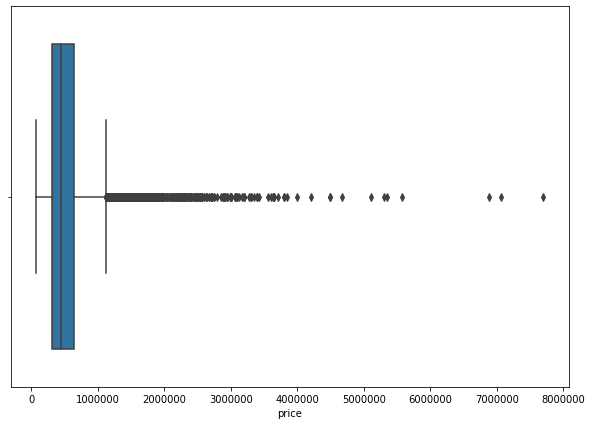

In [4]:
#Visualize housing prices and identify outliers
fig = plt.figure(figsize=(10,7))
sns.boxplot(data['price'])


In [5]:
data_box_states = boxplot_stats(data['price'])
data_box_states

[{'mean': 540088.1417665294,
  'iqr': 323050.0,
  'cilo': 446550.0573865496,
  'cihi': 453449.9426134504,
  'whishi': 1127500.0,
  'whislo': 75000.0,
  'fliers': array([1225000., 2000000., 1350000., ..., 1222500., 1575000., 1537000.]),
  'q1': 321950.0,
  'med': 450000.0,
  'q3': 645000.0}]

In [6]:
upper_limit = data_box_states[0]['whishi']
print('upper_limit: %f'%upper_limit)

upper_limit: 1127500.000000


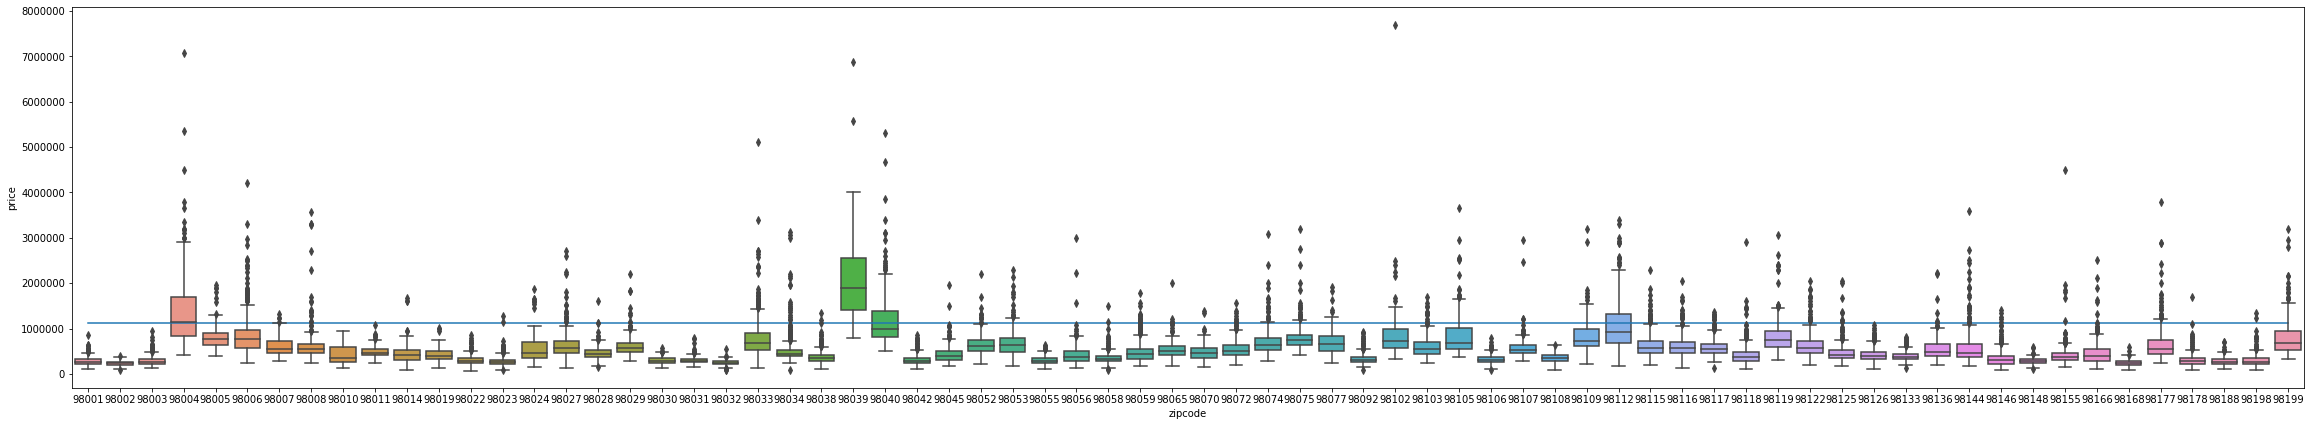

In [15]:
#check outlier by zipcode
price_and_zip = pd.concat([data['zipcode'],data['price']], axis = 1)
zip_group = price_and_zip.groupby('zipcode')
price_and_zip.sum()
fig = plt.figure(figsize=(40,7))
plt.plot([upper_limit]*70)
sns.boxplot(x=price_and_zip['zipcode'],y=price_and_zip['price'])

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'price'),
 Text(2.5, 0, 'bedrooms'),
 Text(3.5, 0, 'bathrooms'),
 Text(4.5, 0, 'sqft_living'),
 Text(5.5, 0, 'sqft_lot'),
 Text(6.5, 0, 'floors'),
 Text(7.5, 0, 'waterfront'),
 Text(8.5, 0, 'view'),
 Text(9.5, 0, 'condition'),
 Text(10.5, 0, 'grade'),
 Text(11.5, 0, 'sqft_above'),
 Text(12.5, 0, 'sqft_basement'),
 Text(13.5, 0, 'yr_built'),
 Text(14.5, 0, 'yr_renovated'),
 Text(15.5, 0, 'zipcode'),
 Text(16.5, 0, 'lat'),
 Text(17.5, 0, 'long'),
 Text(18.5, 0, 'sqft_living15'),
 Text(19.5, 0, 'sqft_lot15')]

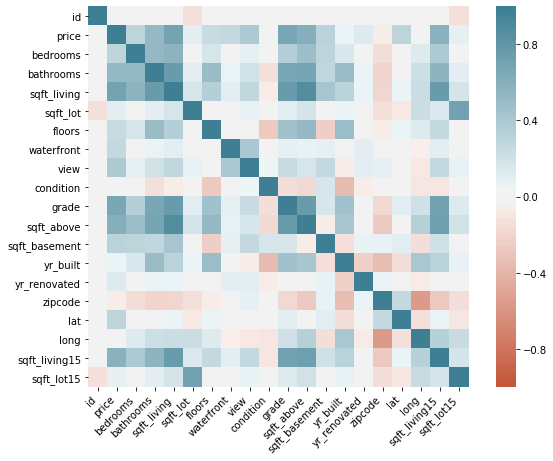

In [20]:
#Visualize the relationship betwee features
corr = data.corr()
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [42]:
#Drop highly correlated features (p>0.9)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
zipped_col = zip(data.columns,columns)
for col in tuple(zipped_col):
        print(col)

#Drop unwanted features (id, lat, long, view)
to_drop = ['id','lat','long','view']
data = data.drop(to_drop, axis=1)


('date', True)
('price', True)
('bedrooms', True)
('bathrooms', True)
('sqft_living', True)
('sqft_lot', True)
('floors', True)
('waterfront', True)
('condition', True)
('grade', True)
('sqft_above', True)
('sqft_basement', True)
('yr_built', True)
('yr_renovated', True)
('zipcode', True)
('sqft_living15', True)
('sqft_lot15', True)


In [31]:
#Strip the trailing character(T0000) in date feature
data['date'] = [date[0:-7] for date in data['date']]
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,1800,7503


In [46]:
data.shape

(21613, 17)

In [55]:
#Weed out outliers i.e. property with extremely high or low price
data = data.drop(data.loc[data['price']>upper_limit].index, axis=0)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,98027,1410,1287


In [59]:
#Spliting dataset into test(20%) and train(80%)
y = data['price'].values
X = data.drop('price',axis =1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Upload data to S3


### Algorithms and Techniques

### Benchmark

## Methodology

## Results